# Projeto: Emissão Acústica Petrobras
## Laboratório de Processamento de Sinais - UFRJ
## Autor: Natanael Junior (natmourajr@lps.ufrj.br)

O objetivo deste notebook é a análise estatística dos dados bem como outras análise que podem ser úteis para o projeto

In [23]:
# Carregando dados
import scipy.io as sio
import numpy as np
mat_contents = sio.loadmat('../../Data/dadosCP2.mat')

inputMatrix = mat_contents['inputMatrix']
fieldNames = mat_contents['fieldNames']
freqPower = mat_contents['power']
normalizedfreqPower = mat_contents['normalizedPower']

In [32]:
print 'inputMatrix: ',inputMatrix.shape
print 'power: ',freqPower.shape
print 'normalized Power: ',normalizedfreqPower.shape



inputMatrix:  (10, 1665)
power:  (32768, 1665)
normalized Power:  (32768, 1665)


[Text(0,0,"[array([u'riseTime'], dtype='<U8')]"),
 Text(0,0,"[array([u'count'], dtype='<U5')]"),
 Text(0,0,"[array([u'energy'], dtype='<U6')]"),
 Text(0,0,"[array([u'duration'], dtype='<U8')]"),
 Text(0,0,"[array([u'maxAmplitudeDB'], dtype='<U14')]"),
 Text(0,0,"[array([u'resolutionLevelCount'], dtype='<U20')]"),
 Text(0,0,"[array([u'countToPeak'], dtype='<U11')]"),
 Text(0,0,"[array([u'reverberationFrequency'], dtype='<U22')]"),
 Text(0,0,"[array([u'maxAmplitude'], dtype='<U12')]"),
 Text(0,0,"[array([u'threshold'], dtype='<U9')]")]

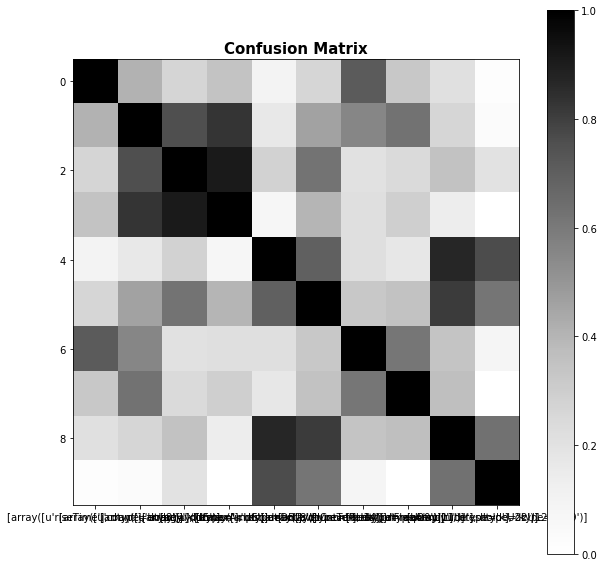

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

#data = np.concatenate((inputMatrix,freqPower),axis=0)
data = inputMatrix
cm = np.corrcoef(data)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greys,clim=(0.0, 1.0))

fig.colorbar(im)

ax.set_title('Confusion Matrix',fontweight='bold',fontsize=15)
tick_marks = np.arange(len(fieldNames))
ax.xaxis.set_ticks(tick_marks)
ax.xaxis.set_ticklabels(fieldNames)

In [80]:
fieldNames[1][0][0]

u'count'